In [1]:
import pandas as pd
import VISUAL as  viz
import random
import Distributions as dist
import importlib
import matplotlib.pyplot as plt
import pickle
import time
import numpy as np
import AstroMLmod
import logging
logging.getLogger('matplotlib.font_manager').setLevel(logging.ERROR)
#rep_file = pd.read_csv('../GalaxyZoo_Main_Features.csv')

#names = [name[0:-4] for name in names]


<Figure size 640x480 with 0 Axes>

In [2]:
#Features stored using pickle

import pickle

with open("ijepa_space.csv",'rb') as file:
    ijepa_rep = pickle.load(file)

with open("ijepa_back_space.csv",'rb') as file:
    ijepa_back_rep = pickle.load(file)

In [2]:
with open("../pca.csv",'rb') as file:
    ijepa_pca_rep = pickle.load(file)

with open("pca_small_ijepa_34.csv",'rb') as file:
    small_ijepa_pca_rep = pickle.load(file)

<Figure size 1920x1440 with 0 Axes>

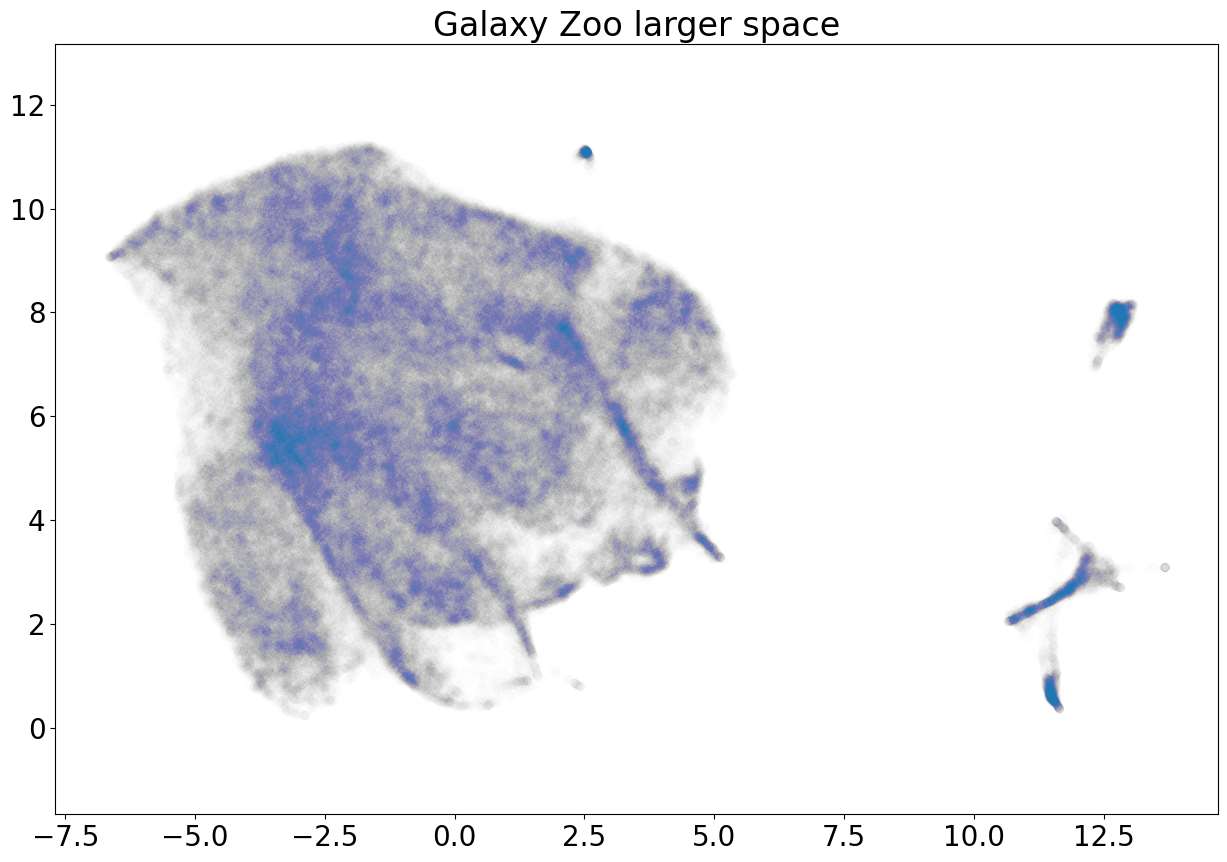

<Figure size 1920x1440 with 0 Axes>

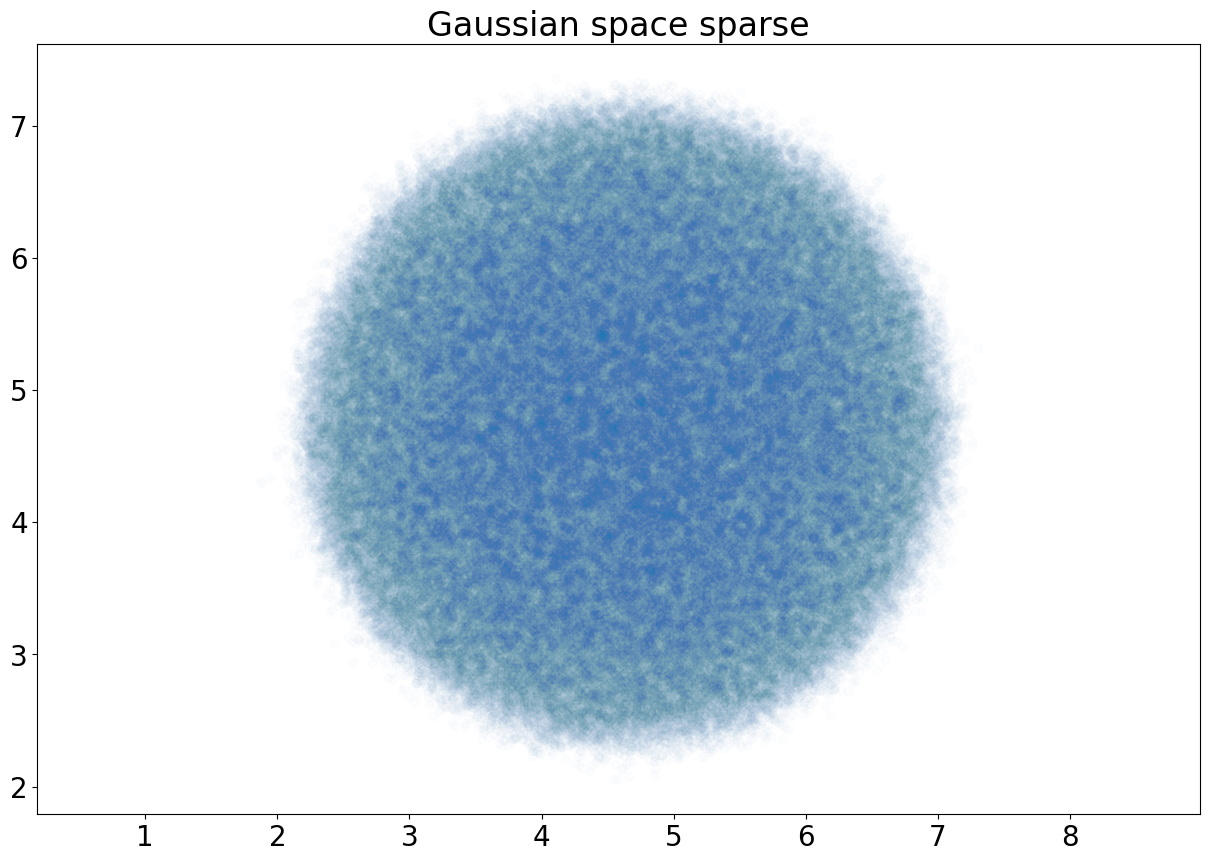

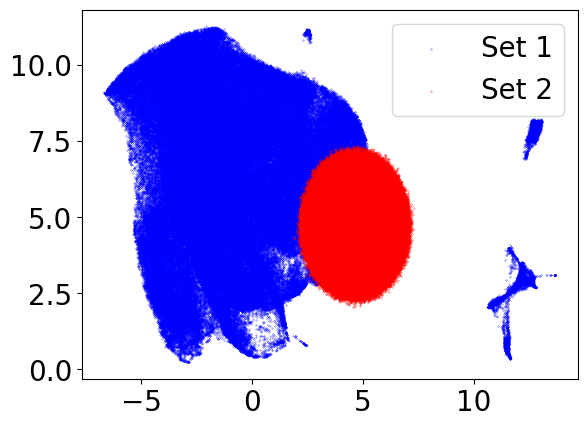

In [14]:
importlib.reload(dist)
dist.scatter_points(ijepa_rep,alpha = 0.005,title =  "Galaxy Zoo larger space")
dist.scatter_points(ijepa_back_rep,alpha = 0.01,title =  "Gaussian space sparse")  

dist.scatter_overlay(ijepa_rep,ijepa_back_rep)

-82.72768831253052


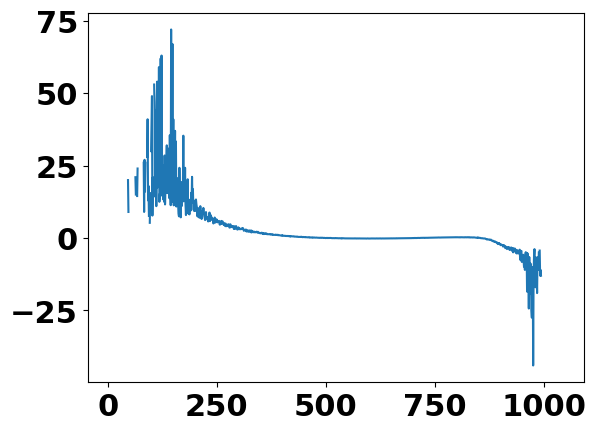

-94.68156695365906


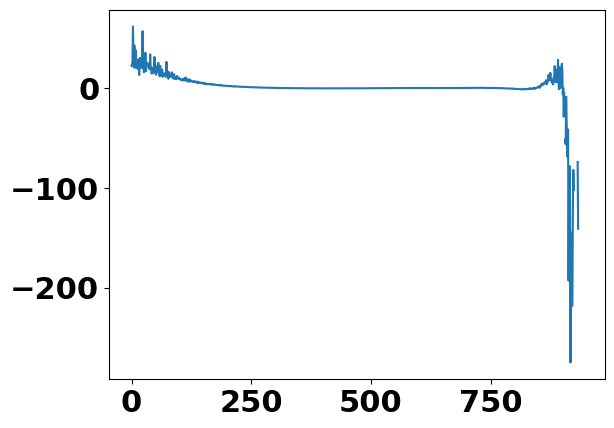

In [15]:
## More structure feature space

avarages1 = []

a = 5
b = 4000
bins = np.logspace(0, a, b)
seed = 45

importlib.reload(AstroMLmod)

number_of_samples = 4000
method = 'landy-szalay'

i_range = 5
j_range = 5
time_1 = time.time()
    
rep = AstroMLmod.scale_and_sample(ijepa_pca_rep,n_output_features = 10,sub_sample_size = number_of_samples,seed = seed)

    
time_1 = time.time()

corr1,_ = AstroMLmod.two_point(rep, bins, method=method,
                      data_R=None, random_state=42, metric = "manhattan")
print(time_1-time.time())

plt.plot(corr1)
plt.show()

##Less structure feature space

importlib.reload(AstroMLmod)

number_of_samples = 4000
method = 'landy-szalay'

i_range = 5
j_range = 5
time_1 = time.time()


rep = AstroMLmod.scale_and_sample(small_ijepa_pca_rep,n_output_features = 10,sub_sample_size = number_of_samples,seed = seed)

time_1 = time.time()

corr2,_ = AstroMLmod.two_point(rep, bins, method=method,
                      data_R=None, random_state=42, metric = "manhattan")
print(time_1-time.time())

plt.plot(corr2)
plt.show()

In [14]:
dist.norm(corr1),dist.norm(corr2)

(np.float64(341.7930291476006), np.float64(1499.275109950756))

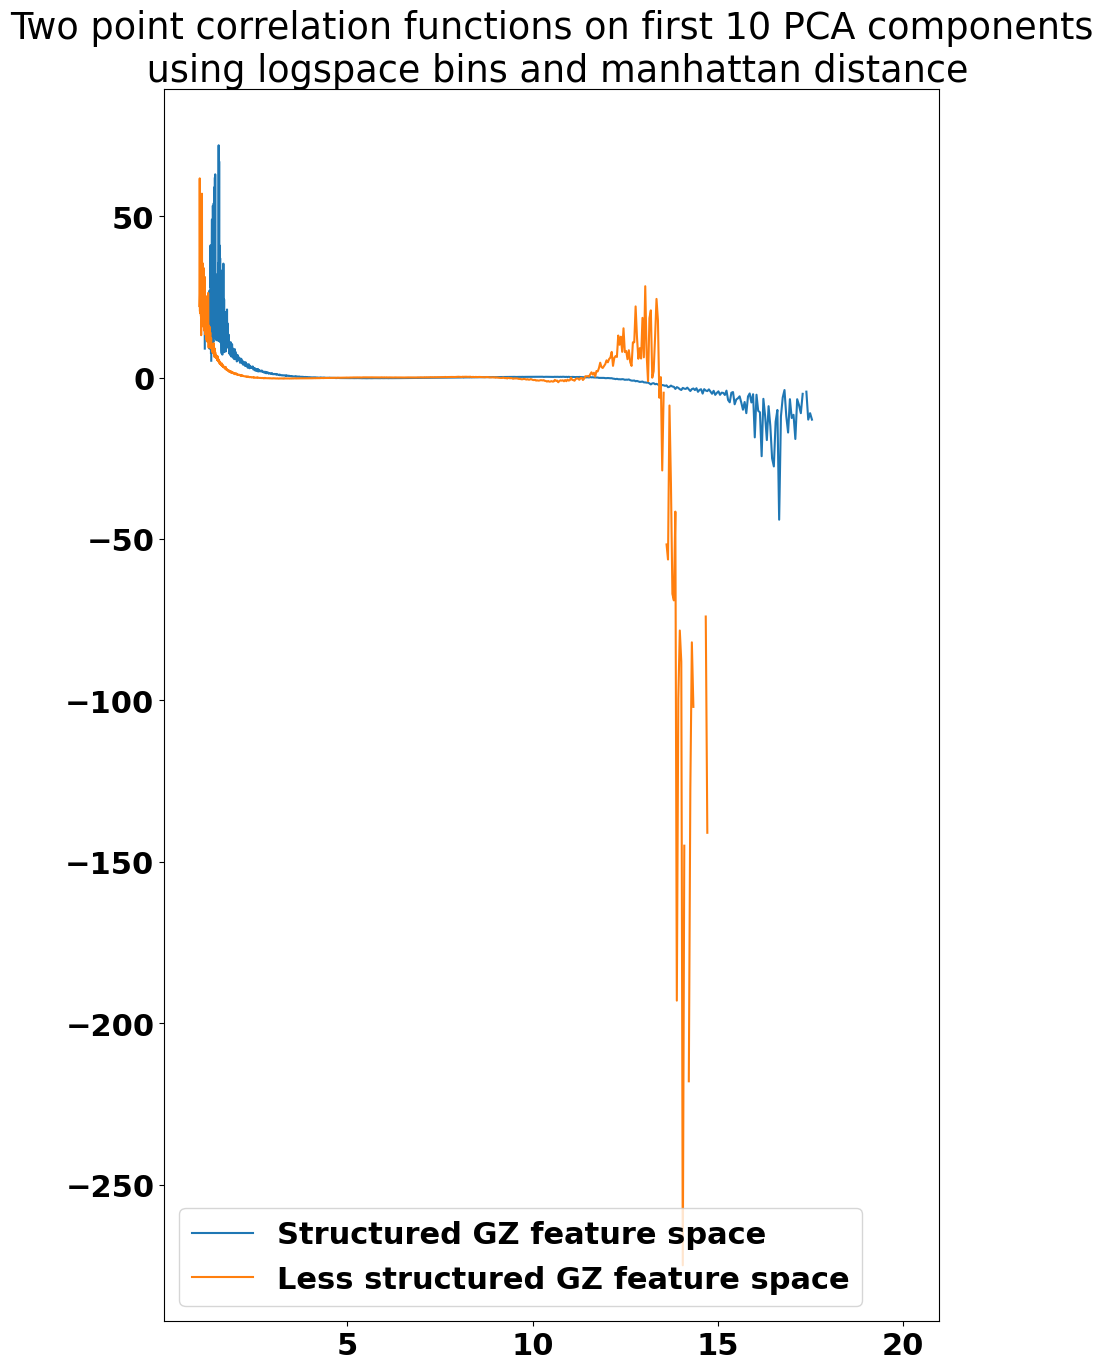

In [16]:
plt.figure(figsize = (10,16))
plt.title("Two point correlation functions on first 10 PCA components\n using logspace bins and manhattan distance")
plt.plot(bins[1:],corr1, label = "Structured GZ feature space")
plt.plot(bins[1:],corr2, label = "Less structured GZ feature space")
plt.legend(loc = "lower left")

plt.show()

In [18]:
np.sum(~np.isnan(corr1))

np.int64(927)

In [19]:
bins[-1]

np.float64(100000.0)

In [ ]:
importlib.reload(dist)
avarages1 = []

a = 40
b = 1000
bins = np.linspace(0, a, b)

number_of_samples = 10000
method = 'landy-szalay'

i_range = 5
j_range = 5
for i in range(i_range):
    structure = []
    time_1 = time.time()
    
    for j in range(j_range):
        sampled = ijepa_pca_rep[np.random.choice(ijepa_pca_rep.shape[0], number_of_samples, replace=False)]
        
    
        corr,_ = AstroMLmod.two_point(sampled, bins, method=method,
                      data_R=None, random_state=42)
        
        
        structure.append(dist.norm(corr))
    print(time.time()-time_1)
    
    avarages1.append((np.mean(structure), np.std(structure)))
avarages2 = []
for i in range(i_range):
    structure = []
    time_1 = time.time()
    
    for j in range(j_range):
        sampled = ijepa_pca_rep[np.random.choice(small_ijepa_pca_rep.shape[0], number_of_samples, replace=False)]
        
        corr,_ = AstroMLmod.two_point(sampled, bins, method=method,
                      data_R=None, random_state=42)
        
        
        structure.append(dist.norm(corr))
    print(time.time()-time_1)
    
    avarages2.append((np.mean(structure), np.std(structure)))

In [6]:
from sklearn.neighbors import KDTree

KDTree.valid_metrics

['euclidean',
 'l2',
 'minkowski',
 'p',
 'manhattan',
 'cityblock',
 'l1',
 'chebyshev',
 'infinity']

findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not

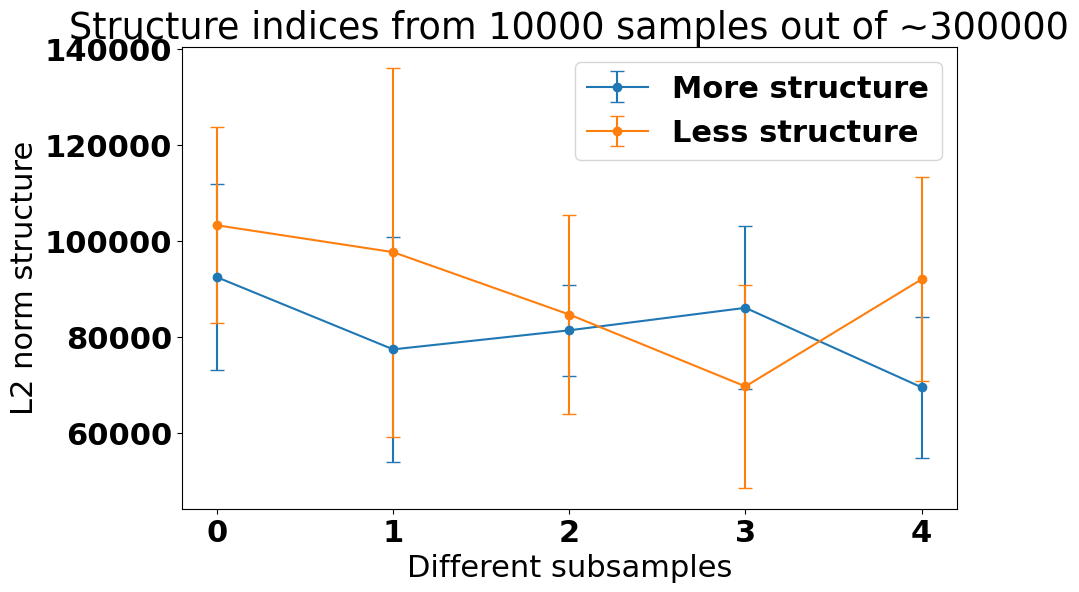

In [11]:
import matplotlib.pyplot as plt
a_values = [a for a, b in avarages1]  # Extract 'a' values
errors = [b for a, b in avarages1]  # Extract errors

# Plot with error bars
plt.ylabel('L2 norm structure')
plt.xlabel('Different subsamples')
plt.title(f"Structure indices from {number_of_samples} samples out of ~300000")
plt.legend()
plt.show()

plt.errorbar(range(len(a_values)), a_values, yerr=errors, fmt='o-', label="More structure", capsize=5)

a_values = [a for a, b in avarages2]  # Extract 'a' values
errors = [b for a, b in avarages2]  # Extract errors

# Plot with error bars
plt.errorbar(range(len(a_values)), a_values, yerr=errors, fmt='o-', label="Less structure", capsize=5)

# Customize the plot
plt.ylabel('L2 norm structure')
plt.xlabel('Different subsamples')
plt.title(f"Structure indices from {number_of_samples} samples out of ~300000")
plt.legend()
plt.show()

#plt.plot([a for a,b in non_featured_same], label = "No features")

In [20]:
np.mean([a for a,b in avarages1]),np.mean([a for a,b in avarages2])

C:\Users\koket\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\numpy\_core\fromnumeric.py:3596: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\koket\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\numpy\_core\_methods.py:138: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


NameError: name 'avarages2' is not defined

In [ ]:
#Featured_space
featured = [(np.float64(2209.6604566766446), np.float64(742.1969326784156)),
(np.float64(1905.4259148198987), np.float64(576.342051767353)),
(np.float64(2022.9756022770496), np.float64(400.0662000756649)),
(np.float64(1841.925971857147), np.float64(435.1380461497806))]


#Less featured space
non_featured = [(np.float64(2168.811075118989), np.float64(936.726227872748)),
(np.float64(1697.3732374129218), np.float64(338.1924423984404)),
(np.float64(2113.205158196534), np.float64(577.2430410627331)),
(np.float64(2034.339697074244), np.float64(155.09757995500442))]


featured_same = [(np.float64(1431.1379015183002), np.float64(577.4349548333603)),
 (np.float64(1461.8560259431158), np.float64(448.416467377315)),
 (np.float64(1382.639445431104), np.float64(282.80410764191276)),
 (np.float64(1300.431036890747), np.float64(298.0377786552131))]

non_featured_same = [(np.float64(1354.6156853823418), np.float64(459.53983521499964)),
 (np.float64(1677.4401315294679), np.float64(444.86585830787635)),
 (np.float64(1380.9420378105578), np.float64(435.03832909923466)),
 (np.float64(1364.622550939452), np.float64(392.28184240749084))]

plt.plot([a for a,b in featured_same], label = "Bigger features")

plt.plot([a for a,b in non_featured_same], label = "No features")
plt.show()

In [ ]:
rep = []
background_rep = []
# Insert the representations
for image in range(len(names)):
    rep_0 = []
    for feature in range(512):
        rep_0.append(rep_file["Feature: "+str(feature)][image])
    rep.append(rep_0)
    background_rep.append(random.sample(rep_0,50))                          #Create a background distribution

In [20]:
umap_ =viz.umap(background_rep,name ="Random Galaxy Zoo Subset", min_dist = 0.1, alpha = 0.01, low_memory = True)

TypeError: umap() got an unexpected keyword argument 'low_memory'

In [ ]:
random.sample(rep_0,50)